# Introduction into Exploratory Data Analysis (EDA)

## Exploring Daily Statistics for Trending YouTube Videos

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/e/e1/Logo_of_YouTube_%282015-2017%29.svg", width = 800)

**WHY EDA?**  
Statistical analysis in order to solve tasks and confirm/reject hypotheses is a part of the Data Analyst Life Cycle.  
Initial investigations on your data are key in order to understand them - which again is necessary for further data analysis and future predictions.  
Within an EDA, you will perform initial investigations and aim for:  
- discover patterns 
- spot anomalies 
- test hypotheses 
- check assumptions 

**OBJECTIVE OF THIS NOTEBOOK**  
This notebook contains an example EDA on daily statistics for trending YouTube videos.
We will go through the cleaning and feature engineering part of an EDA as well as the hypotheses making and testing part.
After going through this code-along you will have an idea about
- how to approach an EDA
- the single parts of an EDA
- what lines of code are commonly used within an EDA
- how to build and answer hypotheses

**CONTENT OF THIS NOTEBOOK**  
In this notebook we will have a look at daily statistics for trending YouTube videos.  

The data as well as the data-descriptions are retrieved from [Kaggle](https://www.kaggle.com/datasnaek/youtube-new). The data was collected from Google's You Tube API using an open-source tool available on [Github](https://github.com/mitchelljy/Trending-YouTube-Scraper)
There you can find the following description of this data:  
"YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangnam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for."  

*What does trending mean?*  
According to [YouTube](https://support.google.com/youtube/answer/7239739?hl=en), trending helps viewers see what’s happening on YouTube and in the world. Trending aims to surface videos that a wide range of viewers would find interesting. Some trends are predictable, like a new song from a popular artist or a new movie trailer. Others are surprising, like a viral video. Trending isn’t personalized and displays the same list of trending videos in each country to all users.  
The list of trending videos is updated roughly every 15 minutes. With each update, videos may move up, down, or stay in the same position in the list.

Data are available for different countries as separate files, in this notebook we will use the daily statistics for Germany for the years 2017/2018.


**BUSINESS CASE**  
You work as Data Analyst for a music agency, which has a lot of prospective music stars under contract.  
The agency instructed you to give them an overview about how likely it is, that videos of their stars become trending videos on YouTube.  
They want to know, what number of views, likes, dislikes the most popular trending videos had in the past.    
Do music videos become trending videos at all? Which channels might be a good choice? When is a good time to publish a video?  

Questions about questions - and you should answer them.

## Let's get started

Set-up your working environment

In [2]:
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

## Understand your Data

As first part of an EDA it is important to find out what information is contained in the data set.  
We start by reading in our data and get some basic information for our dataset.  

In [4]:
# read in csv file and display first 5 rows of datset
df = pd.read_csv("data/DEvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [5]:
# check which columns are included in our dataframe
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In order to really understand the data, we need to know what information the different columns contain.    
Here are the explanations of the individual variables:


| Column name | Description |
| --- | ----------- |
| video_id | Unique identifier for each uploaded video|
| trending_date | Date on which this video was trending|
| title | Video title|
| channel_title | Name of YouTube channel |
| category_id  | Category video belongs to |
| publish_time| Date and time, video was published |
| tags| Tags used for this video|
| views | Number of views |
| likes | Number of likes |
| dislikes | Number of dislikes |
| comment_count | Number of comments |
| thumbnail link | Link to reduced-size versions of pictures or videos |
| comments_disabled | States, if comments were disabled or not |
| ratings_disabled | States, if ratings were disabled or not |
| video_error_or_removed | States, if there was an error or if video was removed |
| description | Description of video content |



In [6]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df.shape

(40840, 16)

We have 40840 rows and 16 columns in our dataset.

In [7]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bool  
 15  de

**Data-types**  
- object: We see that we have a lot of object data-types in our dataset. This means, we have strings (meaning text) or mixed data-types in these columns. For video_id, title, channel_title, tags, thumbnail_link and description this is true - however talking about trending_date and publish_date we need to change our data-types into a date format. We will keep that in mind and come back to this later.  
- int64: Furthermore we have integers in category_id, views, likes, dislikes and comment_count, which makes sense, since we are expecting numerical values there.  
- bool: The boolean type indicates, that values are either True or False in these three columns - which makes sense when looking at our column names and descriptions.   
 **Missing values**  
 Below the header *Non-Null* we see how many non-null values we have per column.  Except for description, we have 40840 non-null values in each column which is exactly the same number as we have rows.   
 Meaning: We only seem to have missing values in the description column.

## Initial Hypotheses / Assumptions about Dataset

After browsing through our data and figuring out, what data we have in front of us, we now want to build some hypotheses (in relation to our expectations about what is contained in the data.  

Generally we assume the data is complete (has no missing values) and is correct (has no obvious logical problems that defy our understanding of the content).

We can test these assumptions and confirm our data is valid before moving on with our analysis.  

You will realize, that there is some work to do before starting with our actual analysis.

## Explore and clean your data

In order to test our hypotheses, we will now explore our data in more detail.  


**Drop columns**  
Since we are not interested in all the columns, we can drop some of these to make our exploration easier.

In [8]:
# drop columns we don't need
df.drop(["tags","thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed", "description"], axis=1, inplace=True)

In [12]:
# check result
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,252786,35885,230,1539
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,797196,53576,302,1278
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97190,6146,12703
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,380247,31821,458,1955
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,822213,100684,2467,10244


**Deal with duplicate rows**  
Let's check if we have the same videos (with the same video_id) several times in our dataset.

In [10]:
# check for duplicate rows in video_id column
df["video_id"].duplicated().value_counts()

video_id
False    29627
True     11213
Name: count, dtype: int64

So we have data on 40840 trending videos to analyze. On YouTube, the same video might appear on the trending list for many days. This means that the 40840 videos are not unique videos. In fact, among the 40840 videos, we have 29627 unique videos.  
These duplicate rows exist, since some of the videos stayed on the trending list for more than one day.

As stated in [this analysis](https://ammar-alyousfi.com/2020/youtube-trending-videos-analysis-2019-us), we will apply the following analysis on all of our 40840 trending videos and not only on the unique trending videos. This will give videos which were trending for several days more weight, which is in our interest.

**Transform data types**  
As stated above, we need to transform trending_date and publish_time into a datetime format.  
Fortunately, there is a built-in function in pandas, which will convert an argument to datetime.

In [13]:
# convert trending_date and publish_time into datetime and extract date part from publish_time
# format specifies the present form of our argument we pass into the function
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_date'] = pd.to_datetime(df['publish_time'].dt.date)

In [14]:
# check result
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 17:08:49,252786,35885,230,1539,2017-11-13
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12 22:30:01,797196,53576,302,1278,2017-11-12
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97190,6146,12703,2017-11-13
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12 15:00:01,380247,31821,458,1955,2017-11-12
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12 13:10:36,822213,100684,2467,10244,2017-11-12


**Build new columns/ Feature engineering**  
Since we want to know, when most trending videos get published, we need to create new columns which contain information about the day of the week as well as the time of the day.  

In [15]:
# extract year, month, dayofweek and hour information out of column publish_time and build new column for each
df["publish_year"]=df["publish_time"].dt.year
df["publish_month"]=df["publish_time"].dt.month
df["publish_weekday"]=df["publish_time"].dt.dayofweek
df["publish_hour"]=df["publish_time"].dt.hour

*Note*:
Day of week: Return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.

In [16]:
# check result
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,publish_year,publish_month,publish_weekday,publish_hour
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 17:08:49,252786,35885,230,1539,2017-11-13,2017,11,0,17
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12 22:30:01,797196,53576,302,1278,2017-11-12,2017,11,6,22
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97190,6146,12703,2017-11-13,2017,11,0,7
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12 15:00:01,380247,31821,458,1955,2017-11-12,2017,11,6,15
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12 13:10:36,822213,100684,2467,10244,2017-11-12,2017,11,6,13


Let's also do this for the trending date.

In [17]:
# extract year, month, day-of-week out of column trending_date and build new column for each
df["trending_year"]=df["trending_date"].dt.year
df["trending_month"]=df["trending_date"].dt.month
df["trending_weekday"]=df["trending_date"].dt.dayofweek

In [18]:
# check result
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,publish_year,publish_month,publish_weekday,publish_hour,trending_year,trending_month,trending_weekday
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 17:08:49,252786,35885,230,1539,2017-11-13,2017,11,0,17,2017,11,1
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12 22:30:01,797196,53576,302,1278,2017-11-12,2017,11,6,22,2017,11,1
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97190,6146,12703,2017-11-13,2017,11,0,7,2017,11,1
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12 15:00:01,380247,31821,458,1955,2017-11-12,2017,11,6,15,2017,11,1
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12 13:10:36,822213,100684,2467,10244,2017-11-12,2017,11,6,13,2017,11,1


We want to know, what categories have most of the trending videos - however so far, we only have an category ID and don't know what's behind this ID.  
Fortunately we can decode the IDs and transform them into actual category names.

In [19]:
# create dictionary called category_names with category_id as key and the actual category name as value
# we get these values from the Google API or here: https://gist.github.com/dgp/1b24bf2961521bd75d6c
category_names = {
    1:'Film and Animation',
    2:'Autos & Vehicles',
    10:'Music',
    15:'Pets and Animals',
    17:'Sports',
    18:'Short Movies',
    19:'Travel and Events',
    20:'Gaming',
    21:'Videoblogging',
    22:'People and Blogs',
    23:'Comedy',
    24:'Entertainment',
    25:'News and Politics',
    26:'How to and Style',
    27:'Education',
    28:'Science and Technology',
    29:'Non Profits and Activism',
    30:'Movies',
    31:'Anime/Animation', 
    32:'Action/Adventure',
    33:'Classics',
    34:'Comedy', 
    35:'Documentary',
    36:'Drama',
    37:'Family',
    38:'Foreign',
    39:'Horror',
    40:'Sci-Fi/Fantasy',
    41:'Thriller',
    42:'Shorts',
    43:'Shows',
    44:'Trailers'
    }

In [20]:
# create new column called category_name which contains the name of the category, the video belongs to
# the map() function is used to map values of Series according to input correspondence (https://www.w3resource.com/pandas/series/series-map.php)
df['category_name'] = df['category_id'].map(category_names)

In [21]:
# check result
df[["title", "category_id", "category_name"]].head()

,title,category_id,category_name
0,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,24,Entertainment
1,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,23,Comedy
2,The Trump Presidency: Last Week Tonight with J...,24,Entertainment
3,Das Fermi-Paradoxon,27,Education
4,18 SONGS mit Kelly MissesVlog (Sing-off),24,Entertainment


#### Days between publishing and trending
In our hypotheses we stated that we also want to have a look at the time-interval between video-publication-date and the trending_date.
Thus, we need to create a new column including the time interval in days.

In [22]:
# create new column called trending_days_difference
df['trending_days_difference']=(df["trending_date"]-df["publish_date"]).dt.days

In [53]:
# check result
df[["trending_date", "publish_date", "trending_days_difference"]].sample(10)

,trending_date,publish_date,trending_days_difference
3168,2017-11-29,2017-11-26,3
28836,2018-04-15,2018-04-14,1
28572,2018-04-14,2018-04-13,1
6714,2017-12-17,2017-12-16,1
25811,2018-03-25,2018-03-15,10
6236,2017-12-15,2017-12-14,1
29275,2018-04-17,2018-04-16,1
20080,2018-02-24,2018-02-23,1
22087,2018-03-06,2018-03-05,1
3300,2017-11-30,2017-11-29,1


**Missing values**  
We have already seen above, that we only have missing values in the description column, which we have dropped.  
Let's confirm this again.

In [54]:
# displays sum of missing values per column
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
views                       0
likes                       0
dislikes                    0
comment_count               0
publish_date                0
publish_year                0
publish_month               0
publish_weekday             0
publish_hour                0
trending_year               0
trending_month              0
trending_weekday            0
category_name               0
trending_days_difference    0
dtype: int64

There are no other missing values we have to deal with.

**Descriptive Statistics**  
Let's have a look at our numerical variables and their descriptive statistics.

In [55]:
# the describe() function gives you a good overview
df[["views", "likes", "dislikes", "comment_count", "trending_days_difference"]].describe()

,views,likes,dislikes,comment_count,trending_days_difference
count,"40,840.00","40,840.00","40,840.00","40,840.00","40,840.00"
mean,"603,455.32","21,875.50","1,397.14","2,785.86",1.85
std,"2,348,962.77","101,800.00","14,577.38","17,458.03",19.62
min,518.00,0.00,0.00,0.00,0.00
25%,"27,068.75",533.00,29.00,79.00,1.00
50%,"119,277.00","2,699.00",134.00,376.00,1.00
75%,"443,101.50","11,796.25",532.00,"1,376.00",2.00
max,"113,876,217.00","4,924,056.00","1,470,386.00","1,084,435.00","2,046.00"


Short explanation of the reported measures:
- count: Indication of how many values are present in the columns (NaNs/missing values are not counted).
- mean: average value of the data
- std: standard deviation of the data
- min: the smallest value in the data set
- 25%: 25 % of the data are below this value
- 50%: 50% of the data are below this value. This value is called the median.
- 75%: 75% of the data are below this value
- max: the largest expression in the data set


### Task
#### What can you take away from this table?

Please take some time to consider if the values make sense and make notes where things meet your expectations or what seems out of place.  

1.  it seems so, that 518 views can be enough to get into the trending list
2.  on the other hand another video nearly has 114 Mio. views
3.  the standard deviation is quite high, that results of the different count of views
4.  apparently the time to get more views also takes more days
5.  only newly uploaded videos get into trending list

**From the table above we note that**
- a trending video has on average 603.455 views, 21.875 likes, 1.397 dislikes and 2.785 comments
- on average the time between the video is published and the video is trending is 1,85 days
- the median value for the number of views is 119.277 which means that half of the trending videos have views that are less than that number, and the other half have views larger than that number. The same is true for the median of likes, dislikes, comment_count and trending_days_difference


**Outliers**  
We see in our descriptive statistics, that the minimum and maximum values in our numerical columns are far apart from each other. Let's have a look at these "extreme" values by looking at boxplots.  
*Note:* The following code creates several subplots, meaning that all our numerical variables are plotted next to each other. This can be done by specifying the axes you want to plot each variable on (ax[0][0] means: first row, first column)

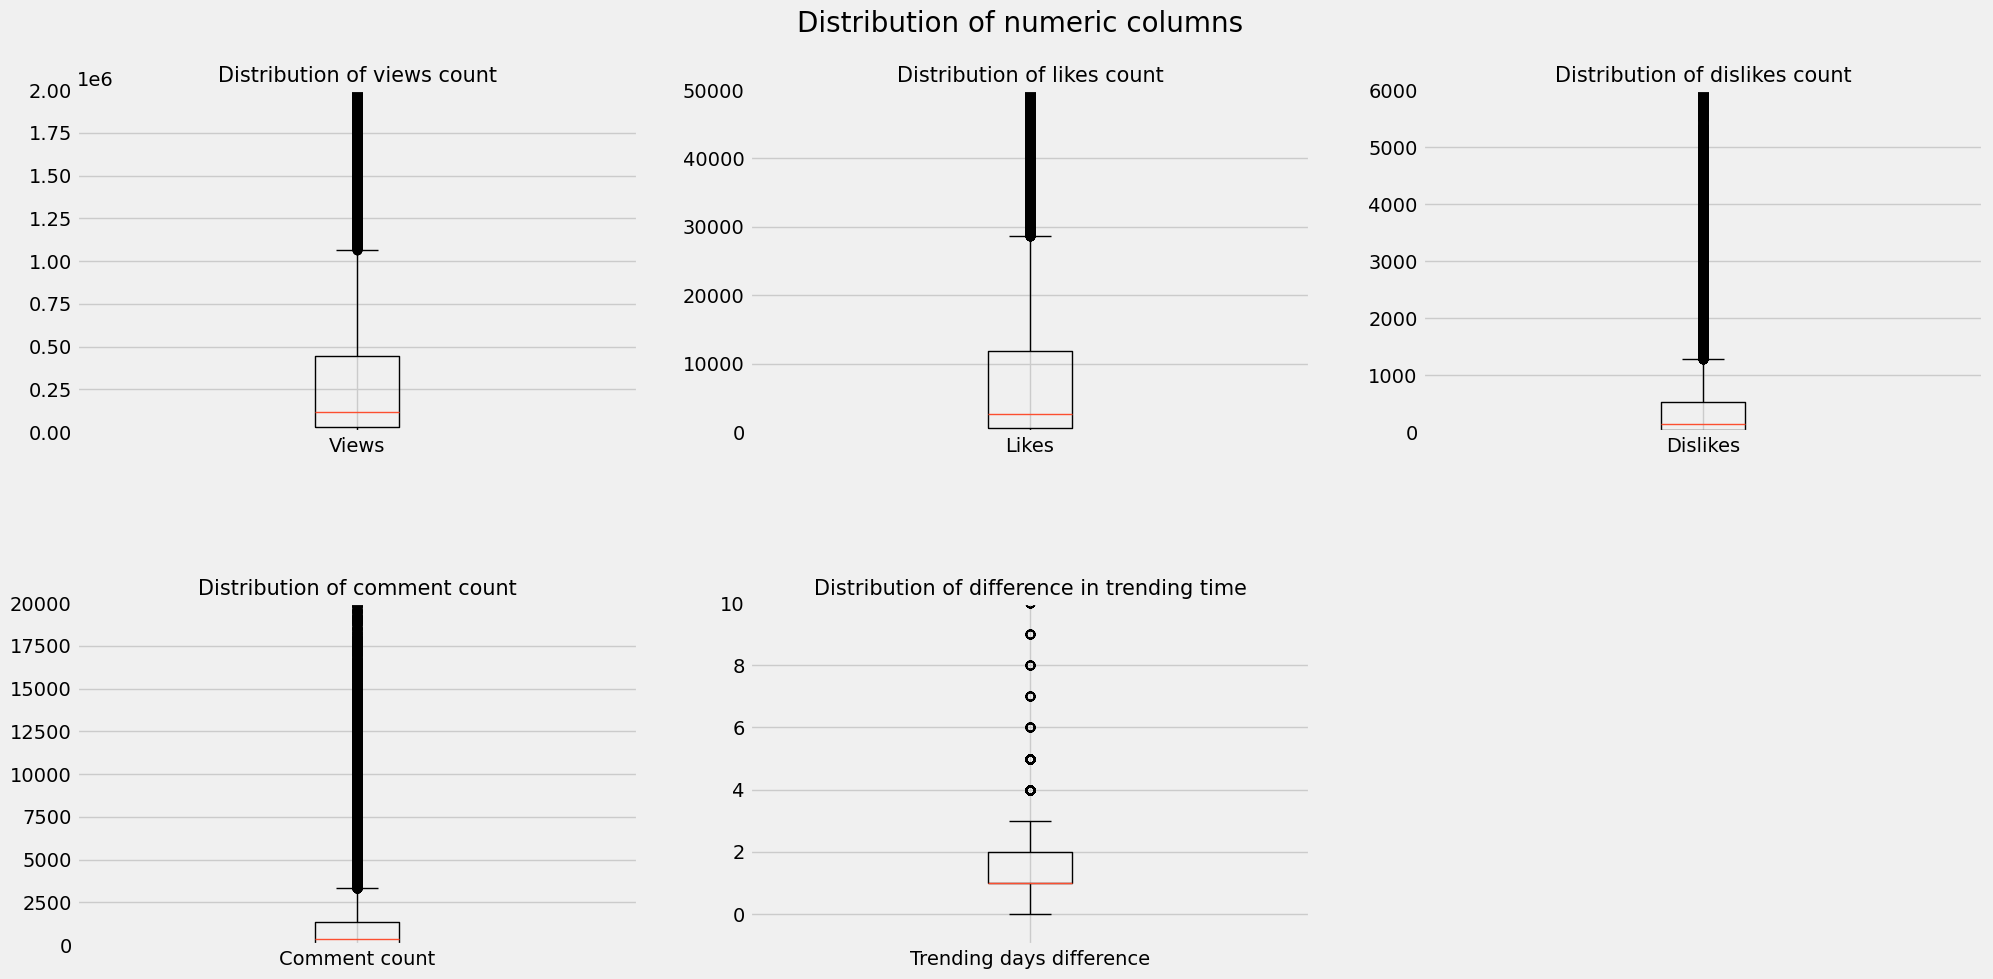

In [56]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df['views']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["Views"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distribution of views count", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df['likes'])
ax[0][1].set_xticklabels(labels=["Likes"])
ax[0][1].set_ylim(0,50000)
ax[0][1].set_title("Distribution of likes count", fontsize = 15);

ax[0][2].boxplot(x = df['dislikes'])
ax[0][2].set_xticklabels(labels=["Dislikes"])
ax[0][2].set_ylim(0,6000)
ax[0][2].set_title("Distribution of dislikes count", fontsize = 15);

ax[1][0].boxplot(x = df['comment_count'])
ax[1][0].set_xticklabels(labels=["Comment count"])
ax[1][0].set_ylim(0,20000)
ax[1][0].set_title("Distribution of comment count", fontsize = 15);
                              
ax[1][1].boxplot(x = df['trending_days_difference'])
ax[1][1].set_xticklabels(labels=["Trending days difference"])
ax[1][1].set_ylim(-1,10)
ax[1][1].set_title("Distribution of difference in trending time", fontsize = 15);

fig.delaxes(ax[1][2]);

We can see that most of the values lie in the lower part of our distribution (50% of our data lies below the red line which represents the median).  
But there are also a couple of videos with a very high number of views, likes, dislikes and comments. Since we can expect some videos to become much more popular than others, these extreme values can be expected and should not be removed.

### Task
#### How would you describe these distribution? 
Please take some time to think about this question and take some notes here.  

1.  views and likes seem to have a causal relationship
2.  also between dislikes and comments
3.  

Let's look at the distribution with the help of histograms. This might take some time to run, please be patient.

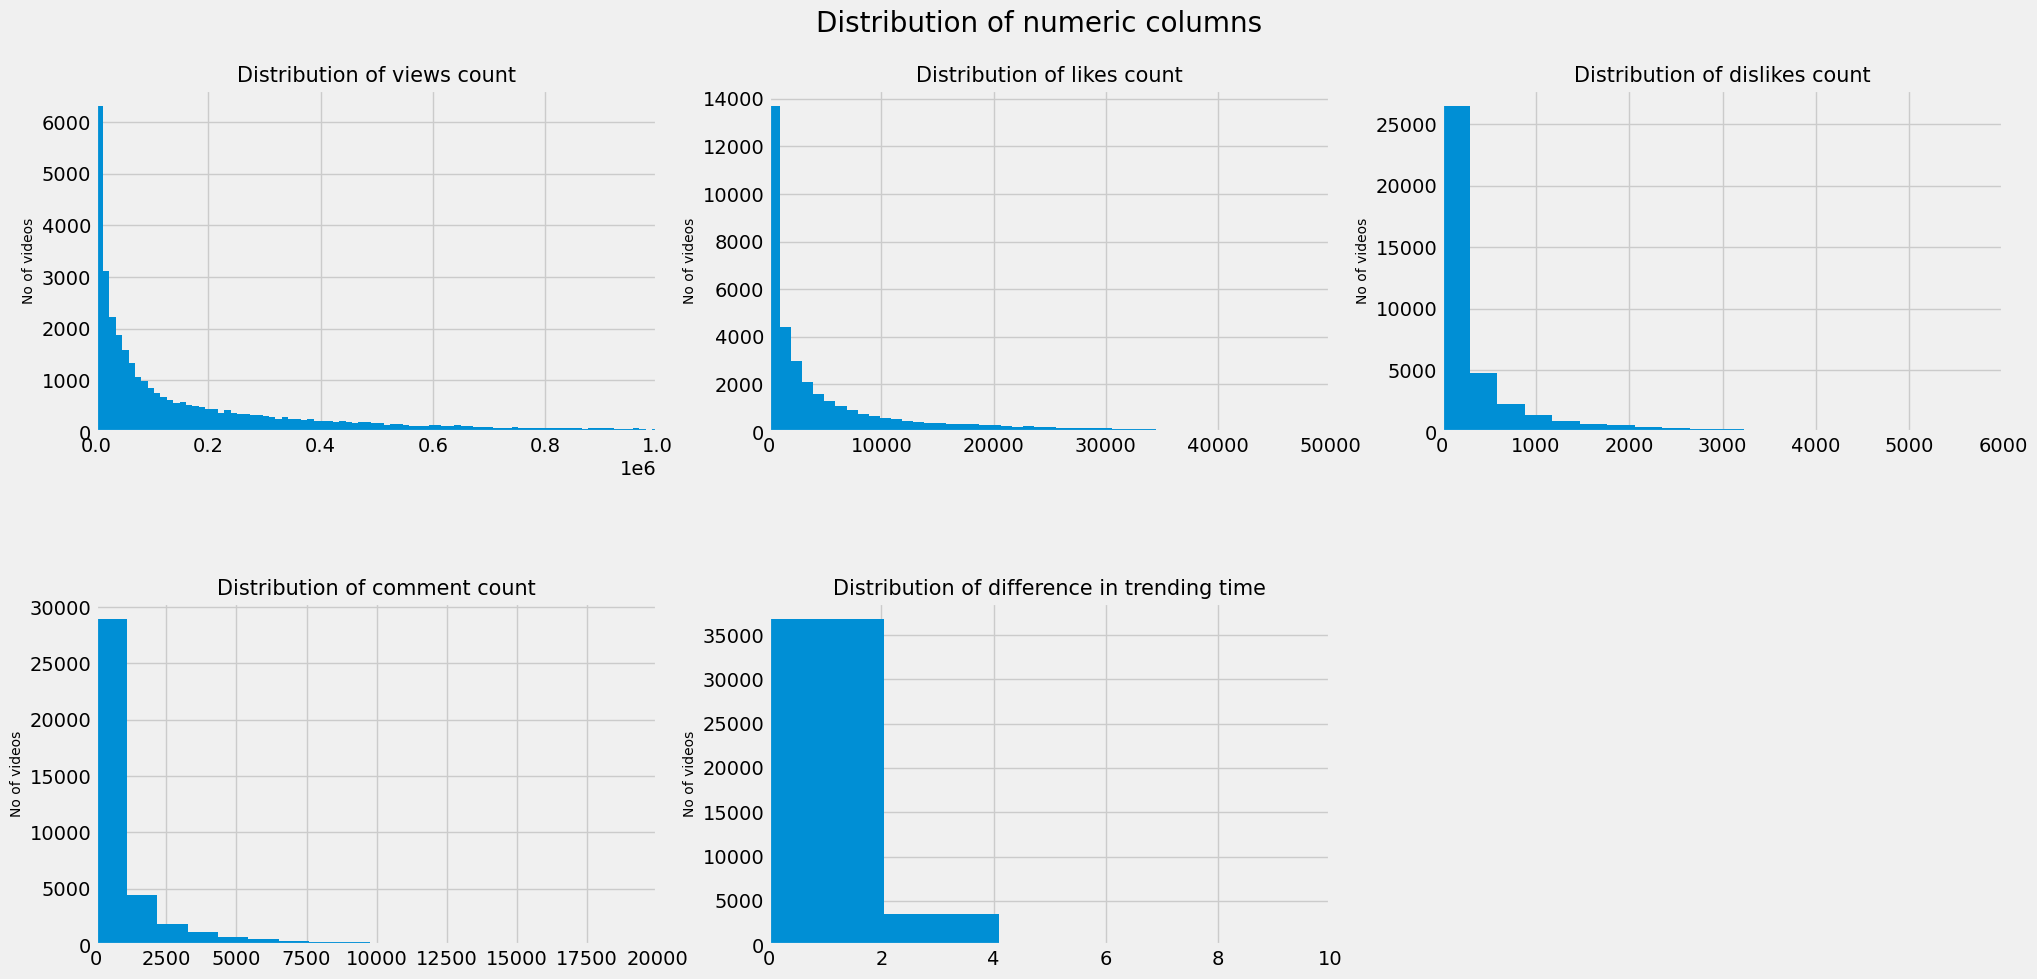

In [57]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df['views'], bins=10000)  # creates histogram for number of views
ax[0][0].set_ylabel("No of videos", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,1000000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Distribution of views count", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df['likes'], bins=5000)
ax[0][1].set_ylabel("No of videos", fontsize = 10)
ax[0][1].set_xlim(0,50000)
ax[0][1].set_title("Distribution of likes count", fontsize = 15);

ax[0][2].hist(x=df['dislikes'], bins=5000)
ax[0][2].set_ylabel("No of videos", fontsize = 10)
ax[0][2].set_xlim(0,6000)
ax[0][2].set_title("Distribution of dislikes count", fontsize = 15);

ax[1][0].hist(x=df['comment_count'], bins=1000)
ax[1][0].set_ylabel("No of videos", fontsize = 10)
ax[1][0].set_xlim(0,20000)
ax[1][0].set_title("Distribution of comment count", fontsize = 15);
                              
ax[1][1].hist(x=df['trending_days_difference'], bins=1000)
ax[1][1].set_ylabel("No of videos", fontsize = 10)
ax[1][1].set_xlim(0,10)
ax[1][1].set_title("Distribution of difference in trending time", fontsize = 15);

fig.delaxes(ax[1][2]);

We see, that we have right skewed distributions, meaning that the mean, median, and mode are all different from each other. In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it (or, visually, the right of the peak). 

**We have made it through the data cleaning process!**  

## Addressing the Business Case: Hypotheses Driven Approach

We have a dataset that we understand and we know it contains valid (or at least plausible) data. We can go ahead and try to create some knowledge and insights to share with our colleagues. We do this by stating our initial ideas as hypotheses that we will then test with the data to see if we they can be confirmed or rejected.

The first step after browsing through our data confirming it is clean and logical, we now want to build some hypotheses in relation to our business case.  
The next task will be to look at the data columns in order to develop some hypotheses.  

### Task 
Write down your own hypotheses about what we could learn from the dataset.   
These hypotheses should be a statement about some insights or relationship you might find in the data. They can be written as a positive statement that you can prove or disprove.

1.  
2.  
3.  

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/> 


#### Our Hypotheses
Since we all need to follow the same hypotheses in this code-along, we use the following hypotheses for exploration during the next steps:

1. Video-Categories differ in amount of trending videos, views, likes and dislikes
2. For certain categories it takes longer to become a trending video after publication than for other categories
3. Some YouTube channels are more successful than others
4. The amount of video publications differ per day and hour
5. Correlations exist between views, likes, dislikes and comments
6. The length of time-interval between the date a video gets published and a video becomes trending also is correlated to number of views, likes, dislikes and comments

In the following we will use the plotting library seaborn (abbreviated by sns). Seaborn is built on top of Matplotlib and extends its options. 

**1. Video-Categories differ in amount of trending videos, views, likes and dislikes**  
**2. For certain categories it takes longer to become a trending video after publication than for other categories**

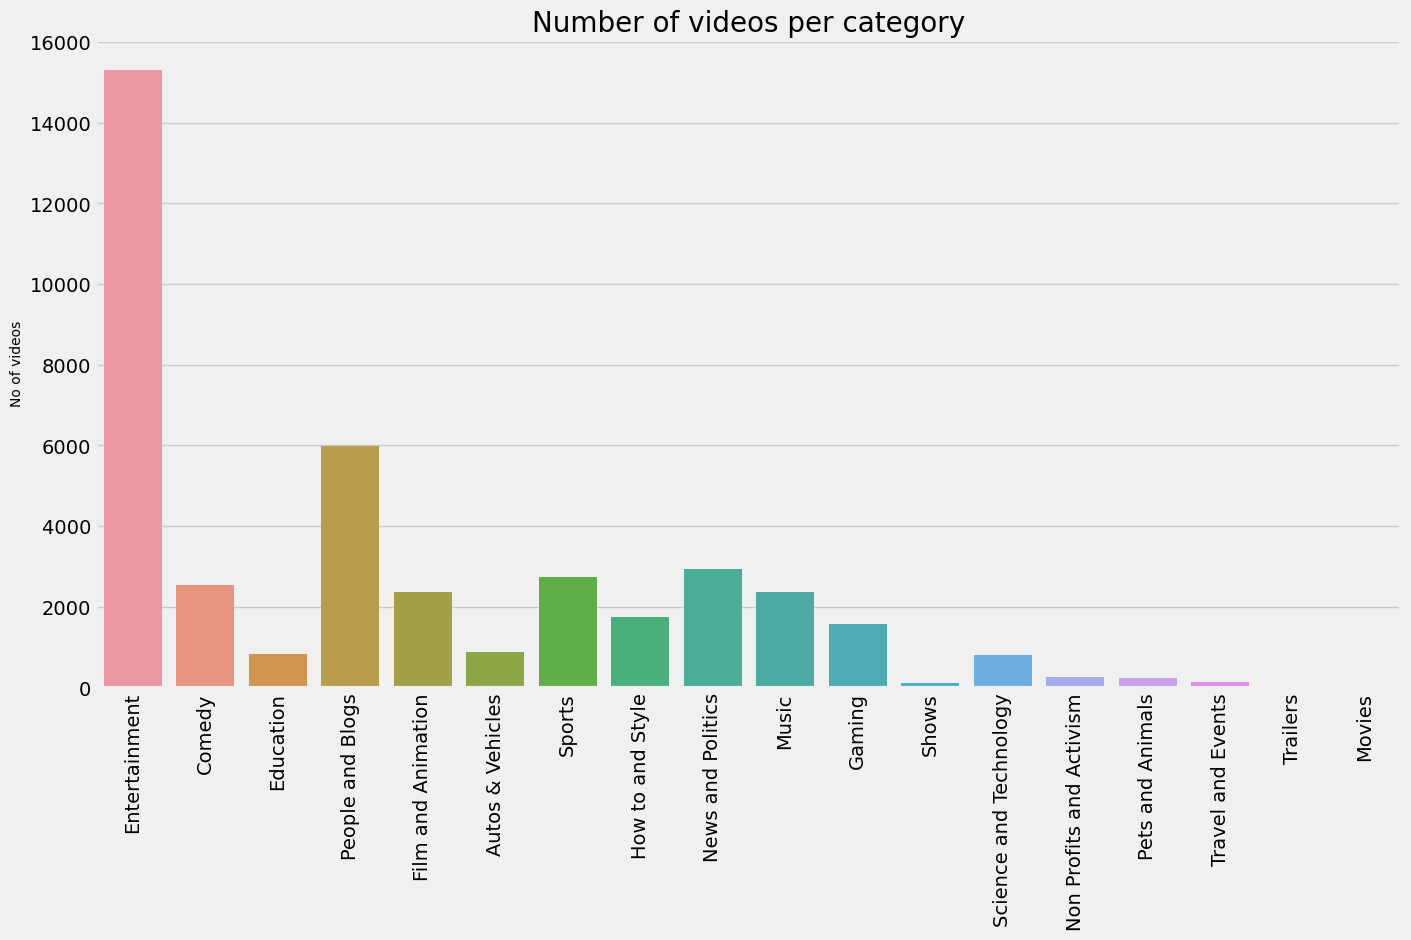

In [58]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df['category_name']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of videos", fontsize = 10); # set label for y-axis
f1.set_title('Number of videos per category', fontsize=20); # set title

We can see, that most of the trending videos belong to the entertainment category. Music is more in the midfield when it comes to the amount of trending videos. The Categories will be represented by the same color in each of the following charts so note the categories we are primarily interested in.

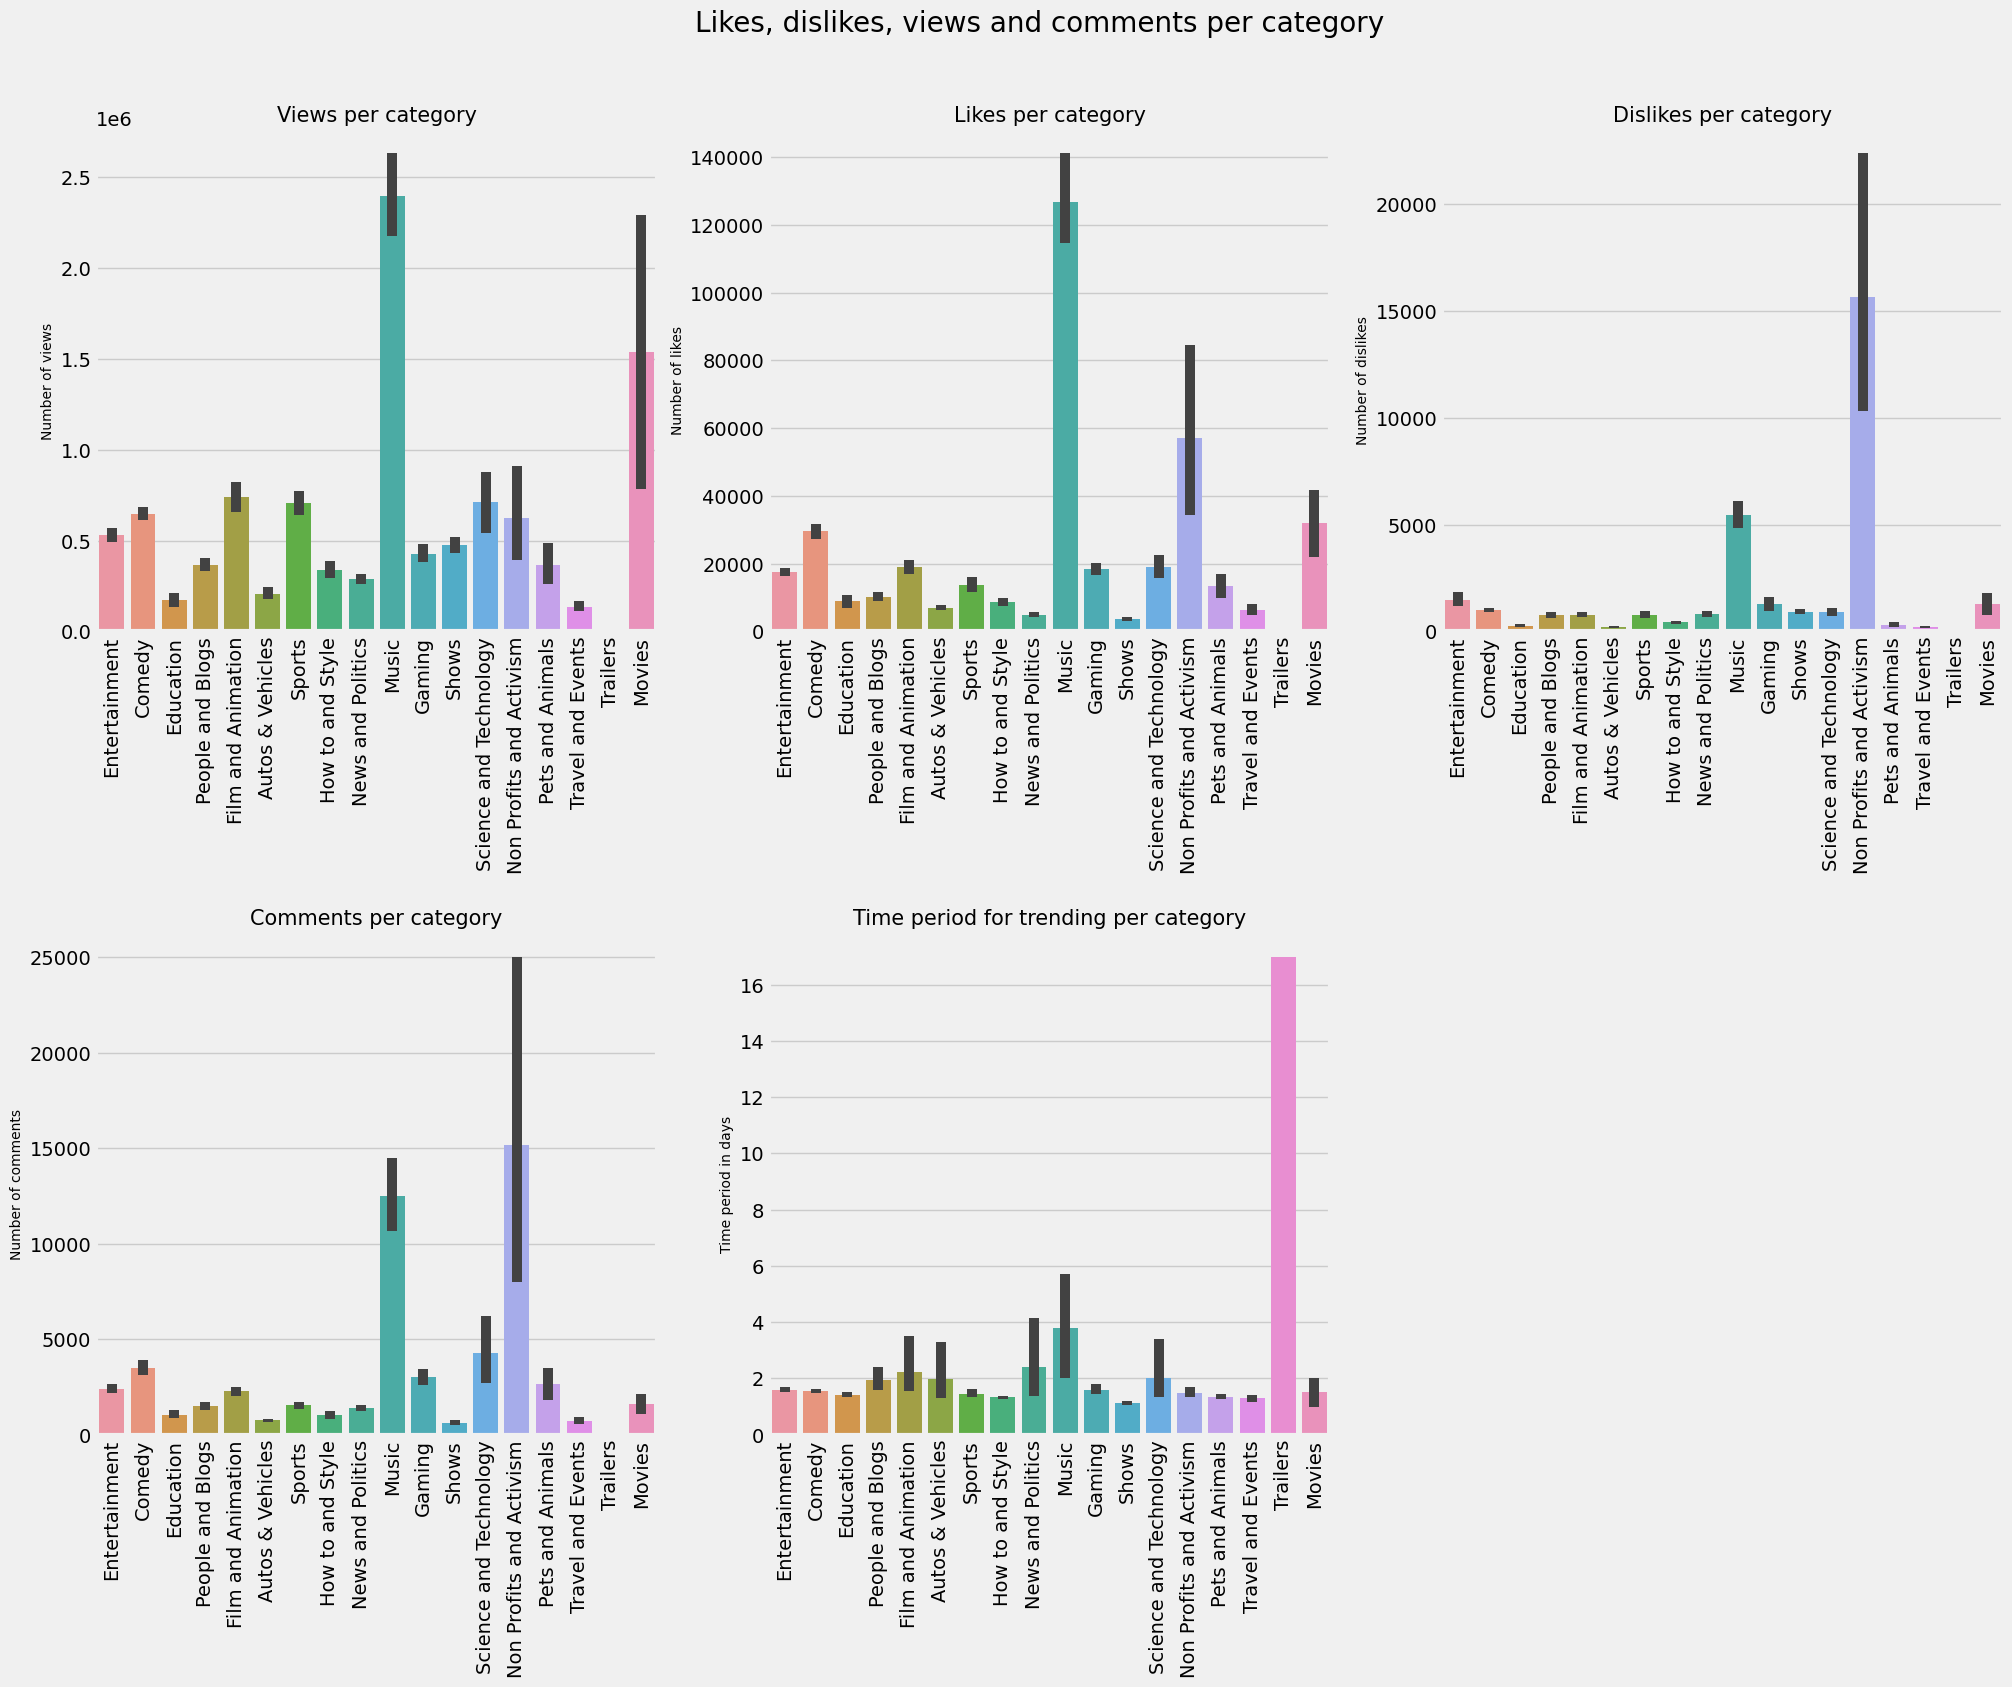

In [59]:
# Plot views, likes, dislikes and comments per category
fig, ax = plt.subplots(2,3, figsize=(20,15)) # create subplots on 2 rows and 2 columns
plt.suptitle('Likes, dislikes, views and comments per category', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.barplot(x=df["category_name"], y = df['views'], ax=ax[0,0]) # creates barchart for number of views
f1.tick_params(axis='x', labelrotation=90) # sets the label y-axis
f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("Number of views", fontsize = 10) # limits the x-axis values from 0 to 1000000
f1.set_title("Views per category", fontsize = 15);  # sets title for subplot

f2= sns.barplot(x=df["category_name"], y = df['likes'], ax=ax[0,1])
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("Number of likes", fontsize = 10)
f2.set_title("Likes per category", fontsize = 15);

f3 = sns.barplot(x=df["category_name"], y = df['dislikes'], ax=ax[0,2])
f3.tick_params(axis='x', labelrotation=90)
f3.set(xlabel=None)
f3.set_ylabel("Number of dislikes", fontsize = 10)
f3.set_title("Dislikes per category", fontsize = 15);

f4 = sns.barplot(x=df["category_name"], y = df['comment_count'], ax=ax[1,0])
f4.tick_params(axis='x', labelrotation=90)
f4.set(xlabel=None)
f4.set_ylabel("Number of comments", fontsize = 10)
f4.set_title("Comments per category", fontsize = 15);

f5 = sns.barplot(x=df["category_name"], y = df['trending_days_difference'], ax=ax[1,1])
f5.tick_params(axis='x', labelrotation=90)
f5.set(xlabel=None)
f5.set_ylabel("Time period in days", fontsize = 10)
f5.set_title("Time period for trending per category", fontsize = 15);

fig.delaxes(ax[1][2]);

Wow, music seems to be a promising category -  The videos belonging to this category have the most views, the most likes and the second most comments.  
It is surprising though that the category with the most trending videos (Entertainment) does not have the highest number of likes, views and comments.  

The time period for music videos to get trending is in comparison quite high - we should tell our agency to stay patient.

**3.Some YouTube channels are more successful than others**

In order to answer this hypothesis, we will have a look the YouTube channels which have published the most trending videos in the music category.

In [60]:
# Top5 channels across all categories
df['channel_title'].value_counts().head()

channel_title
Galileo           200
Ruhrpottwache     185
Анатолий Шарий    182
Çukur             180
Auf Streife       180
Name: count, dtype: int64

In [61]:
# Top5 channels for category music
df.query("category_name == 'Music'")['channel_title'].value_counts().head()

channel_title
385idéal       45
MrRevillz      33
Kontra K       29
Deutsch Rap    29
netd müzik     28
Name: count, dtype: int64

385idéal seems to publish most trending videos. We should do some research on this channel and recommend it to our colleagues.

**4. The amount of video publications differ per day and hour**

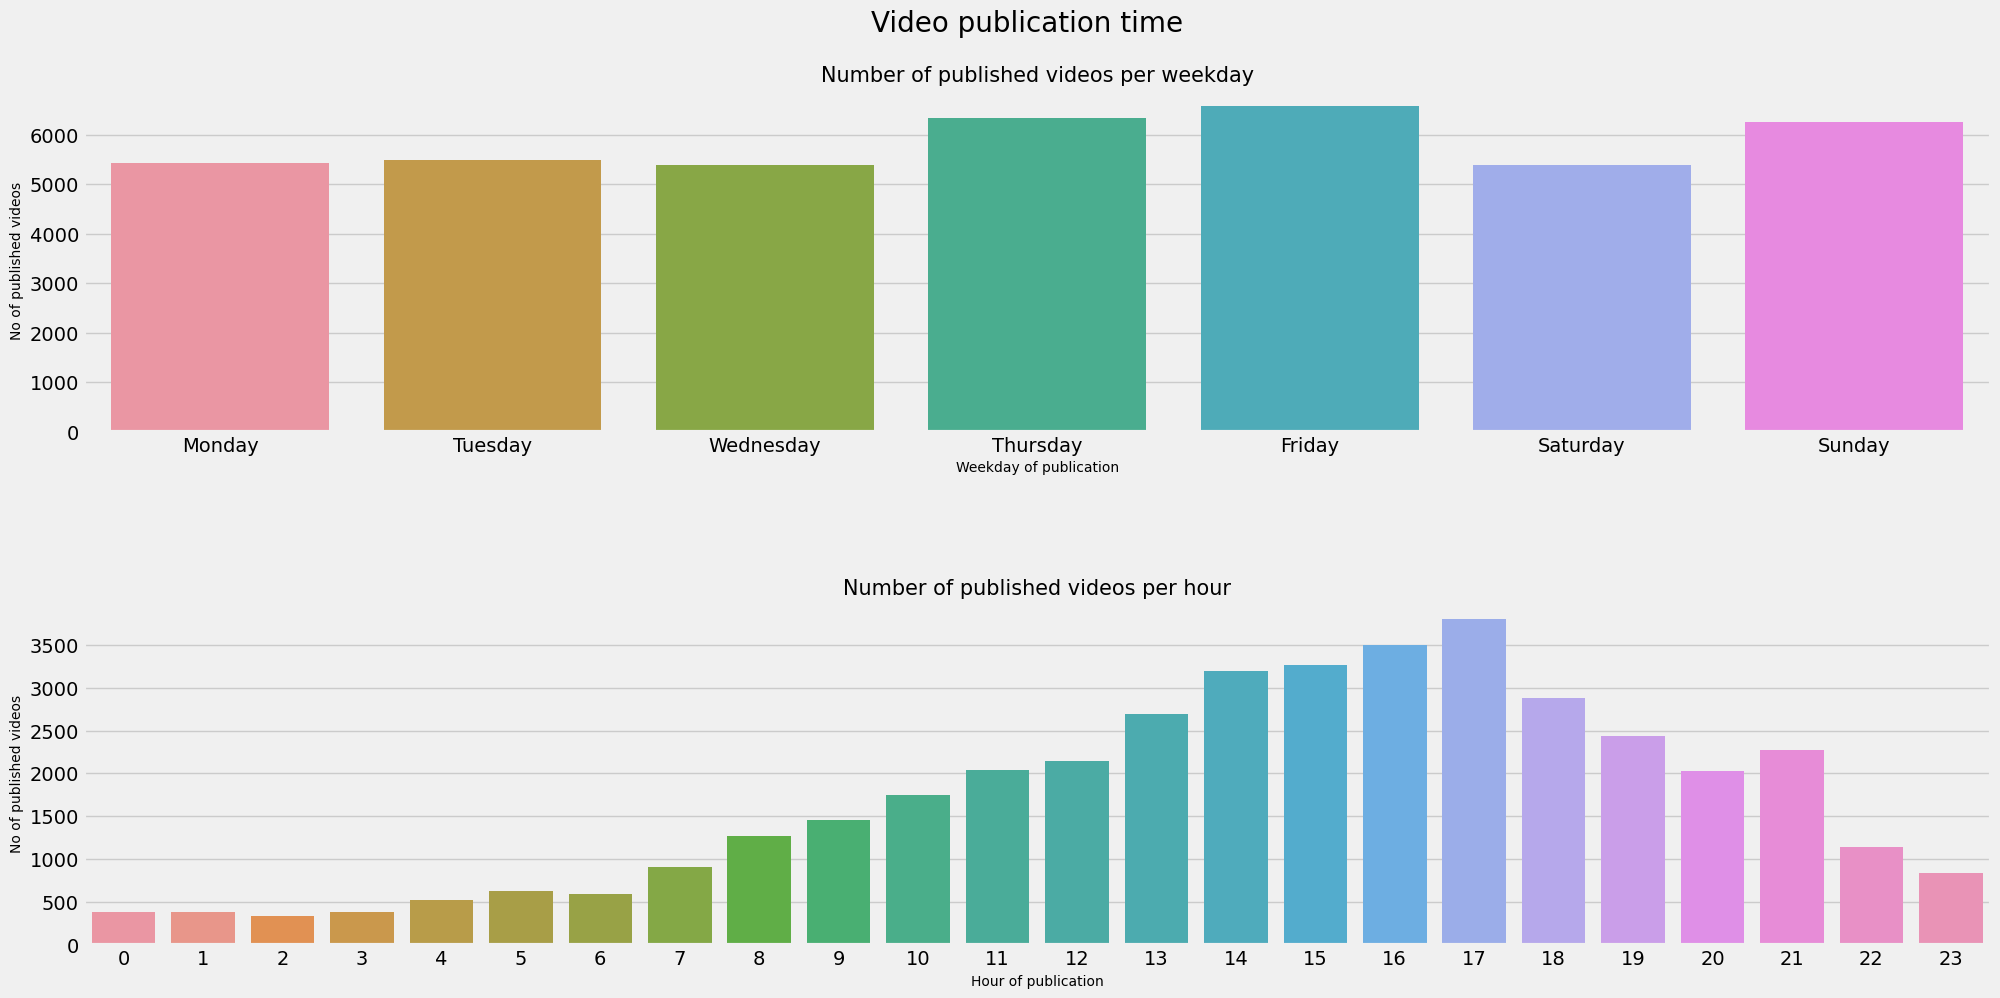

In [62]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.suptitle('Video publication time', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=df['publish_weekday'], ax=ax[0])
f1.set_ylabel("No of published videos", fontsize = 10)
f1.set_xlabel("Weekday of publication", fontsize = 10)
f1.set_xticks([0,1,2,3,4,5,6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of published videos per weekday", fontsize = 15);

f2 = sns.countplot(x=df['publish_hour'], ax=ax[1])
f2.set_ylabel("No of published videos", fontsize = 10)
f2.set_xlabel("Hour of publication", fontsize = 10)
f2.set_title("Number of published videos per hour", fontsize = 15);

On fridays most trending videos got published - looking at the exact time of the day, 5pm is the time, when most trending videos got published.  
Let's do the same analysis only for the music category. 

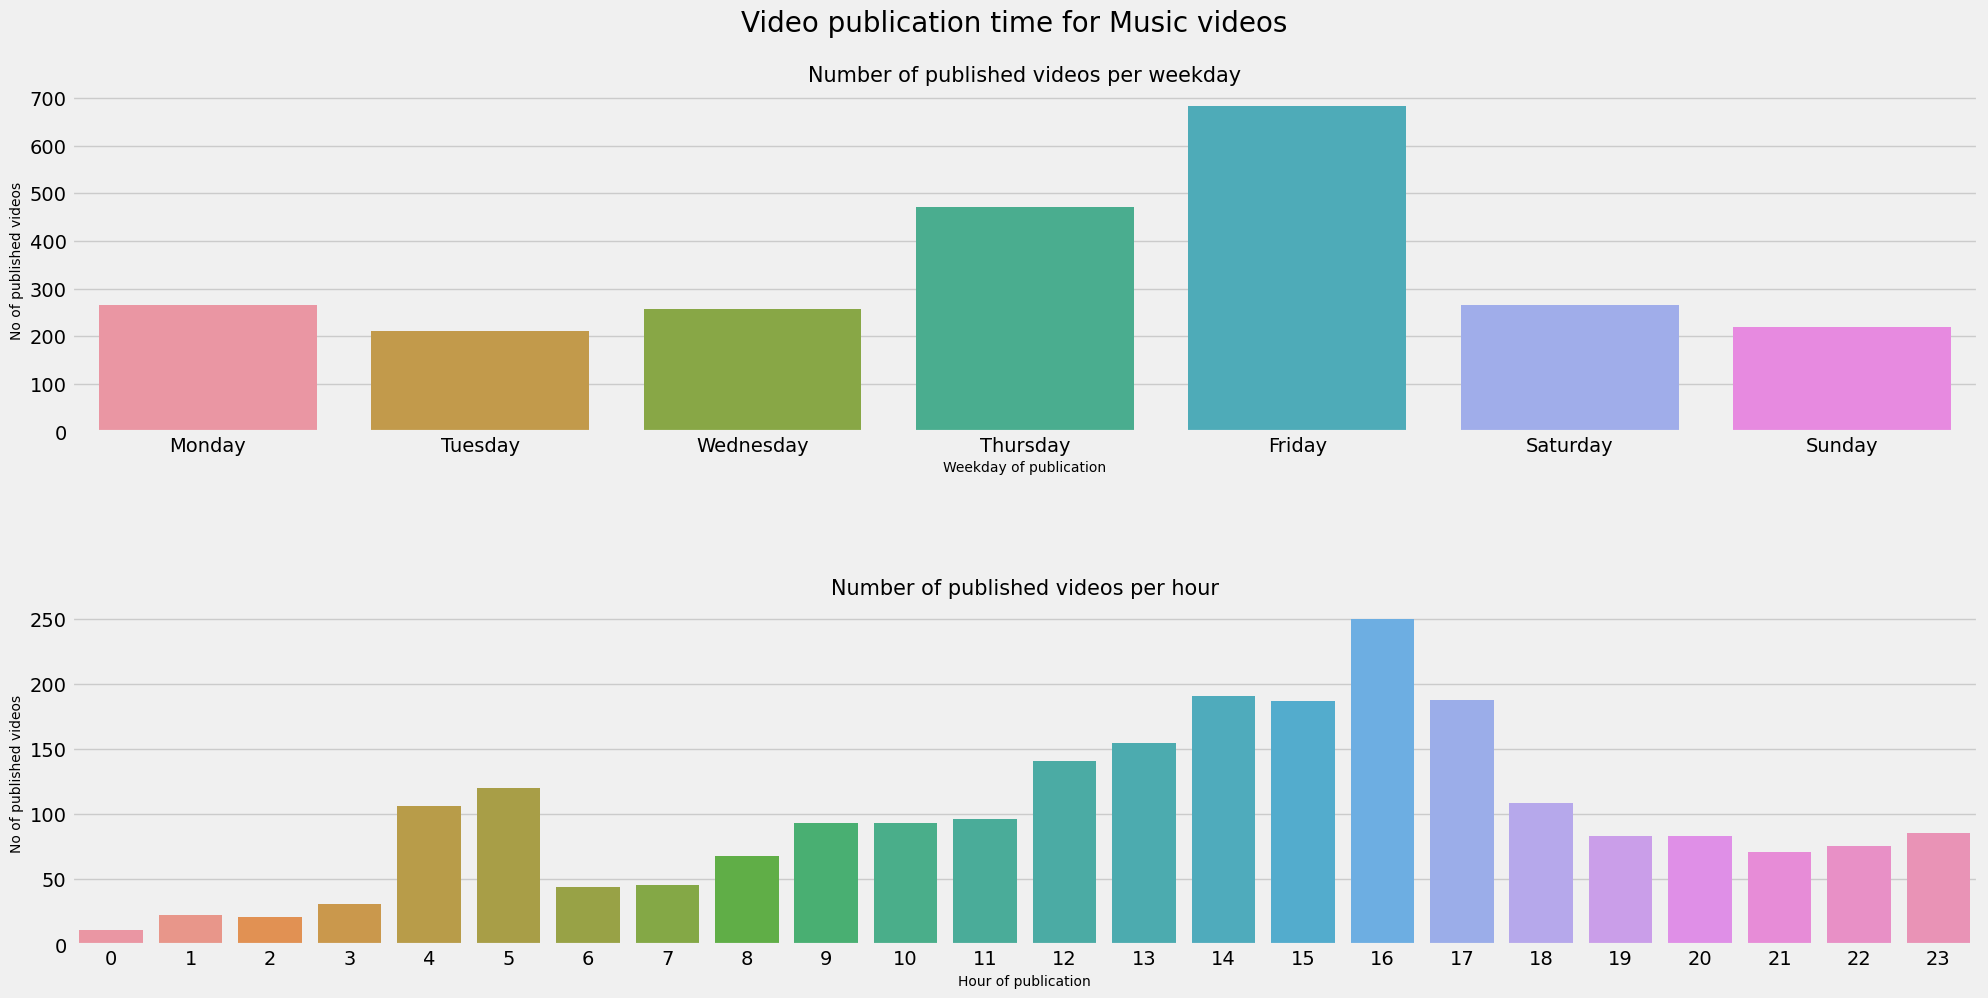

In [63]:
df_music = df.query("category_name == 'Music'")

fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.suptitle('Video publication time for Music videos', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=df_music['publish_weekday'], ax=ax[0])
f1.set_ylabel("No of published videos", fontsize = 10)
f1.set_xlabel("Weekday of publication", fontsize = 10)
f1.set_xticks([0,1,2,3,4,5,6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of published videos per weekday", fontsize = 15);

f2 = sns.countplot(x=df_music['publish_hour'], ax=ax[1])
f2.set_ylabel("No of published videos", fontsize = 10)
f2.set_xlabel("Hour of publication", fontsize = 10)
f2.set_title("Number of published videos per hour", fontsize = 15);

Friday seems to be THE day to publish the videos of our stars! 

## Check for correlations

**5. Correlations exist between views, likes, dislikes and comments**  
**6. The the length of time-interval between the date a video gets published and a video becomes trending also is correlated to number of views, likes, dislikes and comments**

In [64]:
# correlation matrix between these variables
corr_columns=["views", "likes", "dislikes", "comment_count", "trending_days_difference"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,views,likes,dislikes,comment_count,trending_days_difference
views,1.00,0.82,0.56,0.71,0.01
likes,0.82,1.00,0.46,0.85,0.00
dislikes,0.56,0.46,1.00,0.64,0.00
comment_count,0.71,0.85,0.64,1.00,0.00
trending_days_difference,0.01,0.00,0.00,0.00,1.00


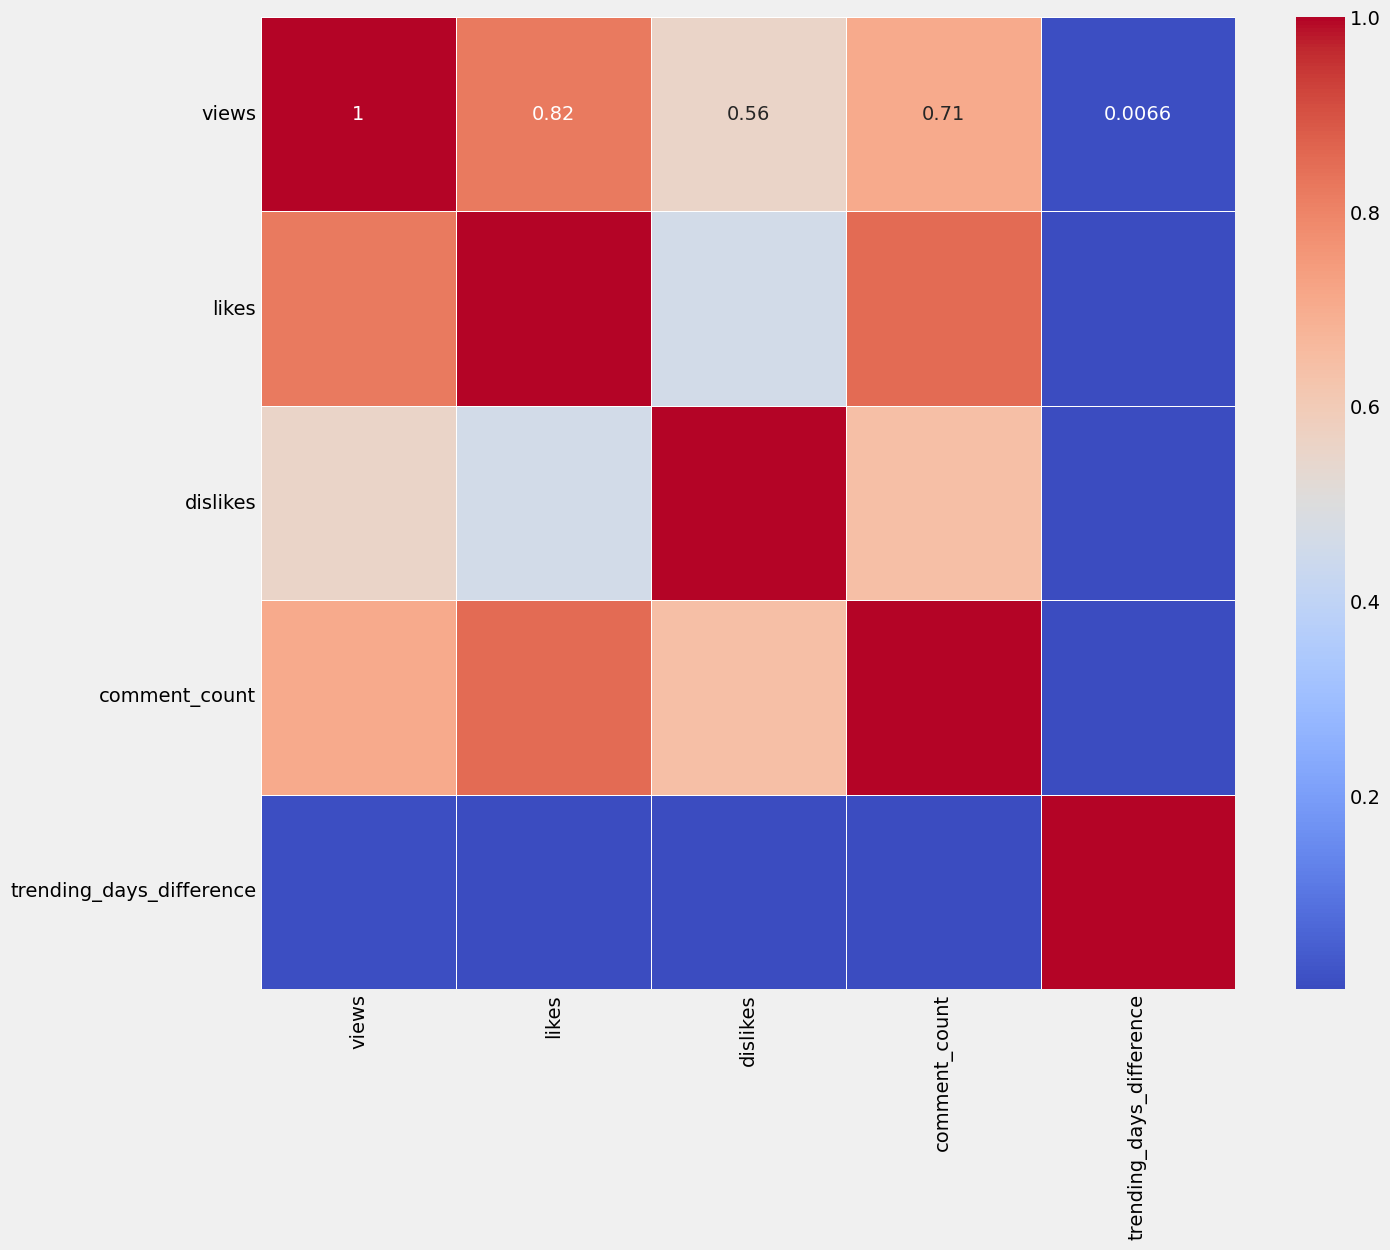

In [65]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

So there are notable positive relationships between
- Views and: Likes and Comments 
- Likes and: Comments
- Dislikes and Comments

There are no relationships between these variables and the time period between publish date and trending date.

### Task

1. Summarize the major issues and actions that needed to be addressed in cleaning and augmenting part. Could the decisions we took about cleaning affect the end understanding of the business case?   
2. Summarize the findings of our EDA here. What will you tell your colleagues from the agency?   

